# Independent Lab: Inferential Statistics

**Intro to Python**  
**Inferential Statistics**  
**Cody Thompson**  
**Date:** 4/28/2025

In this notebook, I will perform inferential statistics on the `ect_data.txt` dataset. The focus will be on building regression models, assessing statistical assumptions, and interpreting results from an inferential perspective. Specifically, I will create a regression model using `intent1_01` as the target variable and several other independent variables, while ensuring the assumptions of linearity, collinearity, homoscedasticity, independence, and normality are validated. Additionally, I will assess the model’s F-test and T-tests to evaluate the significance of predictors and interpret the results from a business perspective.


In [6]:
# load modules
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot

In [7]:
# Set working directory
os.chdir("C://Users//cthom//Downloads//BGEN 632 Intro to Python//GitHub_Repos//Week 9//week9labs//data")  # Replace with your path
os.getcwd()  # Confirm change

'C:\\Users\\cthom\\Downloads\\BGEN 632 Intro to Python\\GitHub_Repos\\Week 9\\week9labs\\data'

In [8]:
# Load the dataset
ect_data_df = pd.read_csv('ect_data.txt', delimiter='\t')

# Quick inspect
ect_data_df.info()
ect_data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,7,7,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,6,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6


In [9]:
# Linear and Multiple Regression

# Define the target variable and independent variables
target_var = 'intent1_01'
independent_vars = ['attitude1_01', 'attitude1_02', 'attitude1_03', 'attitude1_04', 'peruse01']

# Subset the data
X = ect_data_df[independent_vars]
y = ect_data_df[target_var]

# Add constant to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     40.44
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.04e-28
Time:                        22:27:23   Log-Likelihood:                -217.16
No. Observations:                 201   AIC:                             446.3
Df Residuals:                     195   BIC:                             466.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1614      0.365      3.182      0.002       0.441       1.881
attitude1_01     0.3890      0.107      3.637      0.000       0.178       0.600
attitude1_02     0.1811      0.078      2.325      0.021       0.028       0.335
attitude1_03    -0.0386      0.101     -0.380      0.704      -0.239       0.162
attitude1_04     0.0559      0.101      0.553      0.581      -0.144       0.255
peruse01         0.2489      0.058      4.258      0.000       0.134       0.364
==============================================================================
Omnibus:                       67.714   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.748
Skew:                          -1.223   Prob(JB):                     1.22e-68
Kurtosis:                       8.600   Cond. No.                         96.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

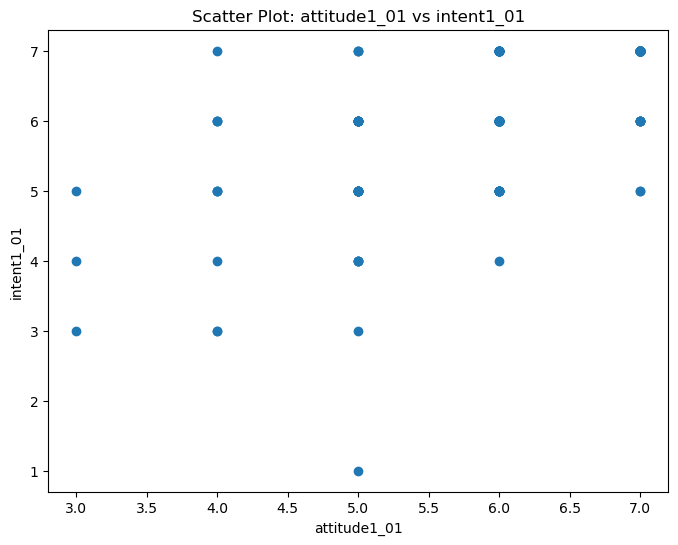

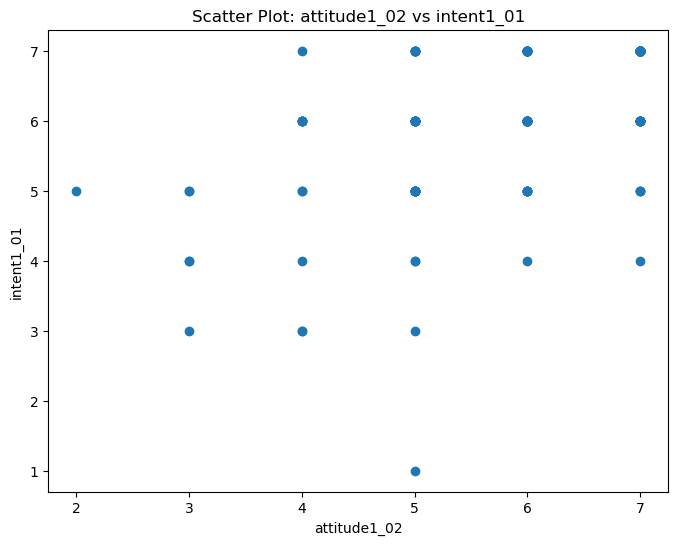

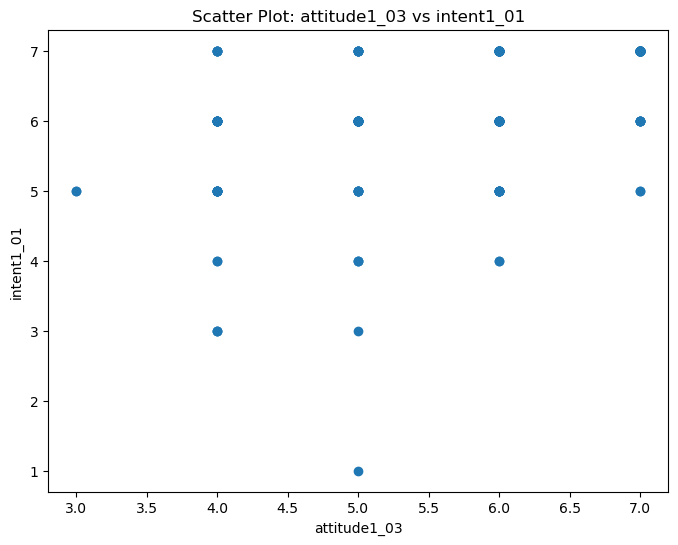

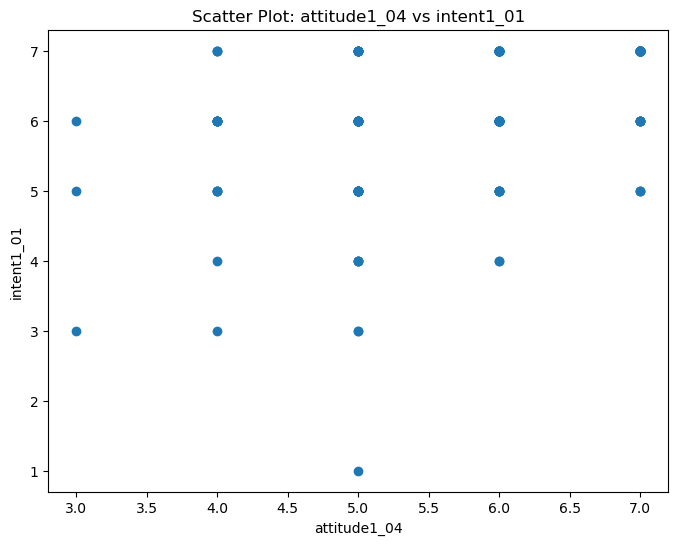

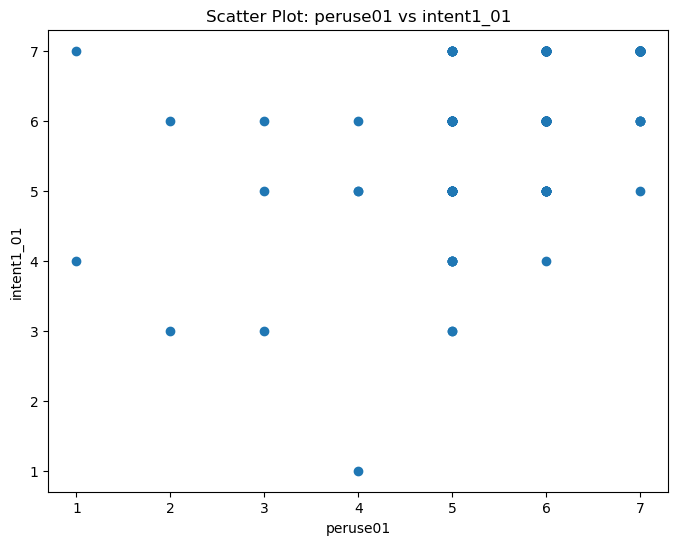

In [10]:
#  Assessing the Assumptions (Linearity)

# Scatterplots to check for linearity
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(ect_data_df[var], y)
    plt.xlabel(var)
    plt.ylabel(target_var)
    plt.title(f'Scatter Plot: {var} vs {target_var}')
    plt.show()


In [12]:
#  Assessing the Assumptions (Collinearity (VIF))

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
vif_data


,Variable,VIF
0,const,51.136257
1,attitude1_01,3.826053
2,attitude1_02,2.671601
3,attitude1_03,4.508346
4,attitude1_04,3.976350
5,peruse01,1.510656


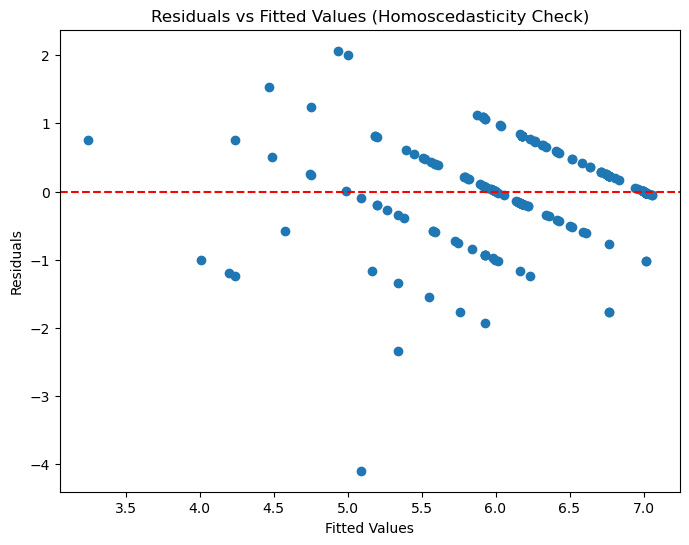

In [13]:
#  Assessing the Assumptions (Homoscedasticity)

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')
plt.show()


In [14]:
#  Assessing the Assumptions Independence (Durbin-Watson Statistic)

# Check the Durbin-Watson statistic for independence
dw_statistic = sm.stats.durbin_watson(model.resid)
dw_statistic


np.float64(1.9039088170929688)

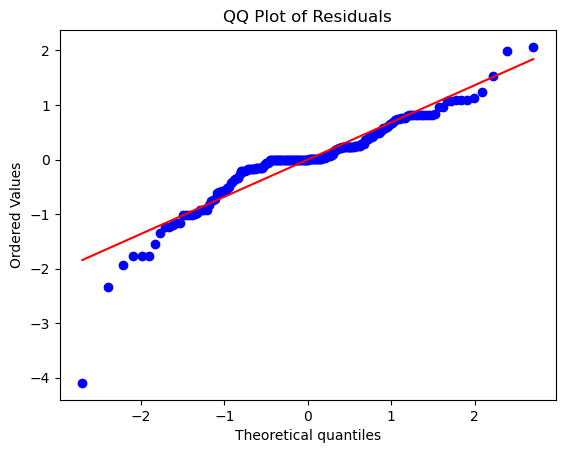

In [15]:
#  Assessing the Assumptions Normality (QQ Plot)

# QQ plot to assess normality
probplot(model.resid, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()


In [16]:
# Assessing the Model F-test and T-tests

# Display the summary of the regression model again to check F-test and T-tests
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     40.44
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.04e-28
Time:                        22:31:52   Log-Likelihood:                -217.16
No. Observations:                 201   AIC:                             446.3
Df Residuals:                     195   BIC:                             466.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1614      0.365      3.182      0.002       0.441       1.881
attitude1_01     0.3890      0.107      3.637      0.000       0.178       0.600
attitude1_02     0.1811      0.078      2.325      0.021       0.028       0.335
attitude1_03    -0.0386      0.101     -0.380      0.704      -0.239       0.162
attitude1_04     0.0559      0.101      0.553      0.581      -0.144       0.255
peruse01         0.2489      0.058      4.258      0.000       0.134       0.364
==============================================================================
Omnibus:                       67.714   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.748
Skew:                          -1.223   Prob(JB):                     1.22e-68
Kurtosis:                       8.600   Cond. No.                         96.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Identify significant variables (p-value < 0.05)
significant_vars = model.pvalues[model.pvalues < 0.05]

# Display significant variables and their p-values
significant_vars


const           0.001704
attitude1_01    0.000353
attitude1_02    0.021087
peruse01        0.000032
dtype: float64

## Interpretation of Two Significant Variables:

- **Variable 1: Attitude1_01**  
   A positive attitude towards the system significantly impacts the intention to use it. Improving employee attitudes can drive better system adoption and usage.

- **Variable 2: Peruse01**  
   Perceived usability of the system is crucial in predicting user intent. Enhancing system usability can lead to higher engagement and adoption.


### Equation for the Model:

intent1_01 = β0 + β1 * attitude1_01 + β2 * attitude1_02 + β3 * peruse01 + ε

Where:
- β0 is the intercept (constant).
- (β1, β2, β3) are the coefficients for the respective variables.
- ε is the error term.

### Interpretation of Results:
- **Intercept (\( \beta_0 \))**: Represents the baseline level of intent to use the system when all predictors are 0.
- **Attitude1_01 (\( \beta_1 \))**: A positive coefficient means that as the attitude score increases, the intent to use the system also increases.
- **Attitude1_02 (\( \beta_2 \))**: This shows the relationship between attitude and system usage, with a positive coefficient indicating that a more positive attitude enhances usage intent.
- **Peruse01 (\( \beta_3 \))**: A positive coefficient means that as the perceived usability score increases, the intent to use the system also increases.

This equation shows how attitudes and perceived usability affect employees' intention to use the system, which is useful for improving adoption.
